<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/ml_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]


In [4]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [7]:
fish_length = smelt_length + bream_length

In [ ]:
fish_length

In [8]:
fish_weight = smelt_weight + bream_weight

In [9]:
fish_data = [[i, w] for i, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [14]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [18]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

# 성능이 0인 이유
편향된 데이터 셋 때문에

In [20]:
import numpy as np

In [21]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [22]:
input_arr.shape

(49, 2)

In [36]:
np.random.seed()
index = np.arange(49)

In [37]:
np.random.shuffle(index)



*   random.seed()
    * 난수를 생성하기 위한 초기값 지정
    * seed를 지정하면 랜덤함수의 결과를 동일하게 재현할 수 있음



In [38]:
input_arr[[1,3]]

array([[10.5,  7.5],
       [11. ,  9.7]])

In [39]:
train_input = input_arr[index[:35]]

In [40]:
train_target = target_arr[index[:35]]

In [41]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

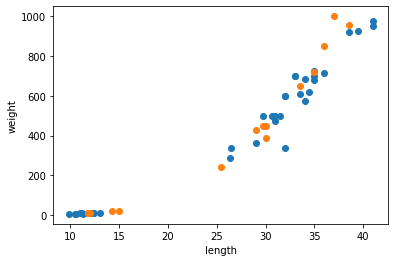

In [42]:
import matplotlib.pyplot as plt


plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.9285714285714286

In [44]:
print(test_input)

[[  29.   430. ]
 [  36.   850. ]
 [  29.7  450. ]
 [  30.   390. ]
 [  30.   450. ]
 [  14.3   19.7]
 [  33.5  650. ]
 [  11.8    9.9]
 [  15.    19.9]
 [  25.4  242. ]
 [  38.5  955. ]
 [  12.     9.8]
 [  37.  1000. ]
 [  35.   720. ]]


In [45]:
kn.predict(test_input)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [46]:
test_target

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

# 넘파이로 데이터 준비하기: 두 리스트 열방향으로 합치기


## np.column_stack(); 튜플형태로 해야함



In [48]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [49]:
fish_data = np.column_stack((fish_length, fish_weight))

##### **라벨 데이터**

In [51]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [52]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## **사이킷런으로 훈련 데이터와 테스트 데이터 나누기**

In [53]:
from sklearn.model_selection import train_test_split

** train_test_split(매개변수들) **


*   array : feature dataset, label dataset
*   test_size = None
*   train_size = None
*   shuffle = True
*   stratify = None
*   random_state = None




In [57]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [56]:
train_input.shape
test_input.shape

(13, 2)

In [58]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
from sklearn.neighbors import  KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [60]:
print(kn.predict([[25, 150]]))

[0.]


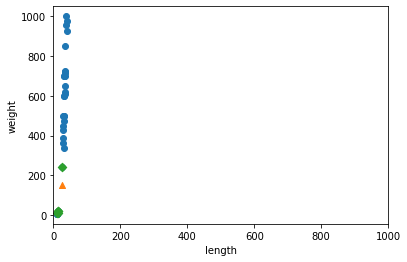

In [73]:
import matplotlib.pyplot as plt


plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')
plt.xlim(0,1000) #x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [69]:
dist, idx = kn.kneighbors([[25, 150]])

### **두 변수의 스케일을 갖게**
*   표준점수(z-score)

In [75]:
mean = np.mean(train_input, axis=0)

In [76]:
std = np.std(train_input, axis = 0)

In [77]:
train_scaled = (train_input - mean)/std

In [78]:
new = ([25,150] - mean) / std

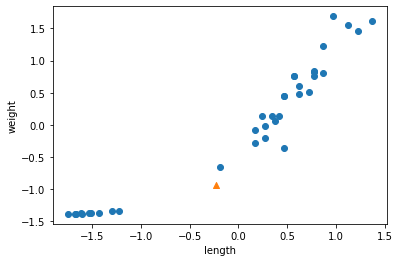

In [80]:

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
# plt.scatter(train_input[idx, 0], train_input[idx, 1], marker='D')
# plt.xlim(0,1000) #x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [81]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
test_scaled = (test_input - mean) / std

In [83]:
kn.score(test_scaled, test_target)

1.0

In [84]:
kn.predict([new])

array([1.])

In [85]:
dist, idx = kn.kneighbors([new])

In [86]:
print(dist, idx)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]] [[21 14 34 32  5]]


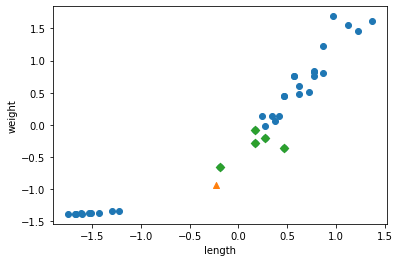

In [88]:

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker='D')
# plt.xlim(0,1000) #x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()